In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from modAL.models import ActiveLearner
#Modeling tools
exec(open('tools/modeling.py').read())
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Descriptors import MolLogP
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
from rdkit.Chem import Descriptors
import sys
import multiprocessing
from standardiser import break_bonds, neutralise, rules, unsalt
from standardiser.utils import StandardiseException, sanity_check
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from sklearn.externals import joblib


import sys
def warn(*args, **kwargs):
    pass  # to suppress sklearn warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn = warn
#Modeling tools
exec(open('tools/modeling.py').read())
from rdkit.Chem.Descriptors import MolLogP
from rdkit.Chem import Descriptors
from tools import tools
from tools import  pipeline as p
from tools import  sar
from sklearn.metrics import cohen_kappa_score
import csv
from rdkit.Chem import MACCSkeys
from sklearn.model_selection import ShuffleSplit
import _pickle as cPickle
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
import bz2
from glob import glob
import _pickle as cPickle
import pickle
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


  * could not import Bokeh, plotting with Highcharts instead.
- no local installation of highcharts found, using web version.
- loading highcharts...


/home/rodolpho/miniconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


* SA scorer not available. RDKit's Contrib dir needs to be in the Python import path...
tools.tools                                   (190829-08:16)
- no local installation of JSME found, using web version.
* SA scorer not available. RDKit's Contrib dir needs to be in the Python import path...
> interactive IPython session.
tools.sar                                     (190829-08:16)


 # Acute Inhalation

##  Acute Inhalation - Morgan

In [2]:
acute_inhalation = joblib.load('Projeto_6_Skin_irritation/model/Modelo_skin_irrit_morgan.pkl')
acute_inhalation_data= pd.read_pickle('Projeto_6_Skin_irritation/model/Dados_adicionais_skin_irrit_morgan.pbz2', compression="bz2")
moldf= acute_inhalation_data['molDF']
del moldf['mol']
moldf.head()

,Outcome,Prediction,Confiability
SMILES,,,
Brc1ccccc1,1.0,Irritant,67.0
C#CCOS(=O)OC1CCCCC1Oc1ccc(C(C)(C)C)cc1,1.0,Non-Irritant,55.0
C(=Cc1ccc(-c2nc3ccccc3o2)cc1)c1ccc(-c2nc3ccccc3o2)cc1,0.0,Non-Irritant,57.0
C(CCOCC1CO1)COCC1CO1,0.0,Irritant,79.0
C1=CC(c2ccc(C3CC=CCC3)cc2)CCC1,0.0,Non-Irritant,50.0


In [4]:
#
moldf['Outcome']=np.where(moldf['Outcome'] >= 1, 1, -1)
moldf['Prediction']=np.where(moldf['Prediction']== 'Irritant', 1, -1)
moldf['Confiability']= moldf['Confiability'].values/100
#
moldf_acute_inhalation = moldf.copy()
#del moldf_acute_inhalation['Outcome']
moldf_acute_inhalation = moldf_acute_inhalation.rename(columns={"Prediction": "Morgan_Pred", "Confiability": "Morgan_Conf"})
fps_acute_inhalation_morgan= np.vstack(acute_inhalation_data['fpDF']['FingerPrint'].values)
X, y = train_test_split( fps_acute_inhalation_morgan , test_size=0.2, random_state=42)
acute_inhalation_morgan_AD_limit= (np.average(acute_inhalation_data['applM'])-(1*(np.std(acute_inhalation_data['applM']))))
acute_inhalation_morgan_K= acute_inhalation_data["k"]
acute_inhalation_morgan_AD = getNeighborsDitance(X,fps_acute_inhalation_morgan , acute_inhalation_morgan_K)
moldf_acute_inhalation['Morgan AD']= np.where(acute_inhalation_morgan_AD >=acute_inhalation_morgan_AD_limit, 1, 0)
moldf_acute_inhalation.head()

,Outcome,Morgan_Pred,Morgan_Conf,Morgan AD
SMILES,,,,
Brc1ccccc1,1,1,0.67,1
C#CCOS(=O)OC1CCCCC1Oc1ccc(C(C)(C)C)cc1,1,-1,0.55,1
C(=Cc1ccc(-c2nc3ccccc3o2)cc1)c1ccc(-c2nc3ccccc3o2)cc1,-1,-1,0.57,1
C(CCOCC1CO1)COCC1CO1,-1,1,0.79,1
C1=CC(c2ccc(C3CC=CCC3)cc2)CCC1,-1,-1,0.50,1


In [5]:
moldf_acute_inhalation['Morgan Pred'] = moldf_acute_inhalation[['Morgan_Pred', 'Morgan_Conf']].prod(1)
moldf_acute_inhalation['Morgan Pred AD'] = moldf_acute_inhalation[['Morgan_Pred', 'Morgan_Conf','Morgan AD']].prod(1)
moldf_acute_inhalation.head()
moldf_acute_inhalation_morgan= moldf_acute_inhalation[['Outcome','Morgan Pred', 'Morgan Pred AD']]
moldf_acute_inhalation_morgan.head()

,Outcome,Morgan Pred,Morgan Pred AD
SMILES,,,
Brc1ccccc1,1,0.67,0.67
C#CCOS(=O)OC1CCCCC1Oc1ccc(C(C)(C)C)cc1,1,-0.55,-0.55
C(=Cc1ccc(-c2nc3ccccc3o2)cc1)c1ccc(-c2nc3ccccc3o2)cc1,-1,-0.57,-0.57
C(CCOCC1CO1)COCC1CO1,-1,0.79,0.79
C1=CC(c2ccc(C3CC=CCC3)cc2)CCC1,-1,-0.50,-0.50


##  Acute Inhalation - MACCS

In [9]:
acute_inhalation_maccs = joblib.load('Projeto_6_Skin_irritation/model/Modelo_skin_irrit_maccs.pkl')
acute_inhalation_data_maccs= pd.read_pickle('Projeto_6_Skin_irritation/model/Dados_adicionais_skin_irrit_maccs.pbz2', compression="bz2")
moldf= acute_inhalation_data_maccs['molDF']
del moldf['mol']
moldf.head()

,Outcome,Prediction,Confiability
SMILES,,,
Brc1ccccc1,1.0,Irritant,85.636667
C#CCOS(=O)OC1CCCCC1Oc1ccc(C(C)(C)C)cc1,1.0,Non-Irritant,75.400000
C(=Cc1ccc(-c2nc3ccccc3o2)cc1)c1ccc(-c2nc3ccccc3o2)cc1,0.0,Non-Irritant,86.400000
C(CCOCC1CO1)COCC1CO1,0.0,Non-Irritant,54.330000
C1=CC(c2ccc(C3CC=CCC3)cc2)CCC1,0.0,Irritant,64.000000


In [11]:
#
moldf['Outcome']=np.where(moldf['Outcome'] >= 1, 1, -1)
moldf['Prediction']=np.where(moldf['Prediction']== 'Irritant', 1, -1)
moldf['Confiability']= moldf['Confiability'].values/100
#
moldf_acute_inhalation_maccs = moldf.copy()
#del moldf_acute_inhalation['Outcome']
moldf_acute_inhalation_maccs= moldf_acute_inhalation_maccs.rename(columns={"Prediction": "MACCS_Pred", "Confiability": "MACCS_Conf"})
fps_acute_inhalation_maccs= np.vstack(acute_inhalation_data_maccs['fpDF']['FingerPrint'].values)
X, y = train_test_split( fps_acute_inhalation_maccs , test_size=0.2, random_state=42)
acute_inhalation_maccs_AD_limit= (np.average(acute_inhalation_data_maccs['applM'])-(1*(np.std(acute_inhalation_data_maccs['applM']))))
acute_inhalation_maccs_K= acute_inhalation_data_maccs["k"]
acute_inhalation_maccs_AD = getNeighborsDitance(X,fps_acute_inhalation_maccs , acute_inhalation_maccs_K)
moldf_acute_inhalation_maccs['MACCS AD']= np.where(acute_inhalation_maccs_AD >=acute_inhalation_maccs_AD_limit, 1, 0)
moldf_acute_inhalation_maccs.head(100)

,Outcome,MACCS_Pred,MACCS_Conf,MACCS AD
SMILES,,,,
Brc1ccccc1,1,1,0.856367,1
C#CCOS(=O)OC1CCCCC1Oc1ccc(C(C)(C)C)cc1,1,-1,0.754000,1
C(=Cc1ccc(-c2nc3ccccc3o2)cc1)c1ccc(-c2nc3ccccc3o2)cc1,-1,-1,0.864000,1
C(CCOCC1CO1)COCC1CO1,-1,-1,0.543300,1
C1=CC(c2ccc(C3CC=CCC3)cc2)CCC1,-1,1,0.640000,1
C1=CC2C3CCC(C3)C2C1,1,1,0.919667,1
C1=CCCCCCC1,-1,1,0.902667,1
C1=Cc2ccccc2Nc2ccccc21,-1,1,0.501333,1
C1CCC2CCCCC2C1,1,1,0.832000,1


In [12]:
moldf_acute_inhalation_maccs['MACCS Pred'] = moldf_acute_inhalation_maccs[['MACCS_Pred', 'MACCS_Conf']].prod(1)
moldf_acute_inhalation_maccs['MACCS Pred AD'] = moldf_acute_inhalation_maccs[['MACCS_Pred', 'MACCS_Conf','MACCS AD']].prod(1)
moldf_acute_inhalation_maccs.head()
moldf_acute_inhalation_maccs= moldf_acute_inhalation_maccs[['Outcome','MACCS Pred', 'MACCS Pred AD']]
del moldf_acute_inhalation_maccs['Outcome']
moldf_acute_inhalation_maccs.head(200)

,MACCS Pred,MACCS Pred AD
SMILES,,
Brc1ccccc1,0.856367,0.856367
C#CCOS(=O)OC1CCCCC1Oc1ccc(C(C)(C)C)cc1,-0.754000,-0.754000
C(=Cc1ccc(-c2nc3ccccc3o2)cc1)c1ccc(-c2nc3ccccc3o2)cc1,-0.864000,-0.864000
C(CCOCC1CO1)COCC1CO1,-0.543300,-0.543300
C1=CC(c2ccc(C3CC=CCC3)cc2)CCC1,0.640000,0.640000
C1=CC2C3CCC(C3)C2C1,0.919667,0.919667
C1=CCCCCCC1,0.902667,0.902667
C1=Cc2ccccc2Nc2ccccc21,0.501333,0.501333
C1CCC2CCCCC2C1,0.832000,0.832000


##  Acute Inhalation - mordred


In [13]:
acute_inhalation_modred = joblib.load('Projeto_6_Skin_irritation/model/Modelo_Skin_Irrit_mordred.pkl')
acute_inhalation_data_mordred= pd.read_pickle('Projeto_6_Skin_irritation/model/Dados_adicionais_Skin_Irrit_mordred.pbz2', compression="bz2")
moldf= acute_inhalation_data_mordred['molDF']
del moldf['mol']
moldf.head()

,Outcome,Prediction,Confiability
SMILES,,,
Brc1ccccc1,1.0,Skin Irritant,80.000000
C#CCOS(=O)OC1CCCCC1Oc1ccc(C(C)(C)C)cc1,1.0,Non-Irritant,91.666667
C(=Cc1ccc(-c2nc3ccccc3o2)cc1)c1ccc(-c2nc3ccccc3o2)cc1,0.0,Non-Irritant,82.000000
C(CCOCC1CO1)COCC1CO1,0.0,Non-Irritant,55.000000
C1=CC(c2ccc(C3CC=CCC3)cc2)CCC1,0.0,Skin Irritant,68.666667


In [15]:
#
moldf['Outcome']=np.where(moldf['Outcome'] >= 1, 1, -1)
moldf['Prediction']=np.where(moldf['Prediction']== 'Skin Irritant', 1, -1)
moldf['Confiability']= moldf['Confiability'].values/100
#
moldf_acute_inhalation_mordred = moldf.copy()
#del moldf_acute_inhalation['Outcome']
moldf_acute_inhalation_mordred= moldf_acute_inhalation_mordred.rename(columns={"Prediction": "Mordred_Pred", "Confiability": "Mordred_Conf"})
fps_acute_inhalation_mordred= np.vstack(acute_inhalation_data_mordred['fpDF']['FingerPrint'].values)
X, y = train_test_split( fps_acute_inhalation_mordred , test_size=0.2, random_state=42)
acute_inhalation_mordred_AD_limit= (np.average(acute_inhalation_data_mordred['applM'])-(1*(np.std(acute_inhalation_data_mordred['applM']))))
acute_inhalation_mordred_K= acute_inhalation_data_mordred["k"]
acute_inhalation_mordred_AD = getNeighborsDitance(X,fps_acute_inhalation_mordred , acute_inhalation_mordred_K)
moldf_acute_inhalation_mordred['Mordred AD']= np.where(acute_inhalation_mordred_AD >=acute_inhalation_mordred_AD_limit, 1, 0)
moldf_acute_inhalation_mordred.head(100)

,Outcome,Mordred_Pred,Mordred_Conf,Mordred AD
SMILES,,,,
Brc1ccccc1,1,-1,0.008000,1
C#CCOS(=O)OC1CCCCC1Oc1ccc(C(C)(C)C)cc1,1,-1,0.009167,1
C(=Cc1ccc(-c2nc3ccccc3o2)cc1)c1ccc(-c2nc3ccccc3o2)cc1,-1,-1,0.008200,1
C(CCOCC1CO1)COCC1CO1,-1,-1,0.005500,1
C1=CC(c2ccc(C3CC=CCC3)cc2)CCC1,-1,-1,0.006867,1
C1=CC2C3CCC(C3)C2C1,1,-1,0.006867,1
C1=CCCCCCC1,-1,-1,0.009600,1
C1=Cc2ccccc2Nc2ccccc21,-1,-1,0.005333,1
C1CCC2CCCCC2C1,1,-1,0.008333,1


In [16]:
moldf_acute_inhalation_mordred['Mordred Pred'] = moldf_acute_inhalation_mordred[['Mordred_Pred', 'Mordred_Conf']].prod(1)
moldf_acute_inhalation_mordred['Mordred Pred AD'] = moldf_acute_inhalation_mordred[['Mordred_Pred', 'Mordred_Conf','Mordred AD']].prod(1)
moldf_acute_inhalation_mordred.head()
moldf_acute_inhalation_mordred= moldf_acute_inhalation_mordred[['Outcome','Mordred Pred', 'Mordred Pred AD']]
del moldf_acute_inhalation_mordred['Outcome']
moldf_acute_inhalation_mordred.head(200)

,Mordred Pred,Mordred Pred AD
SMILES,,
Brc1ccccc1,-0.008000,-0.008000
C#CCOS(=O)OC1CCCCC1Oc1ccc(C(C)(C)C)cc1,-0.009167,-0.009167
C(=Cc1ccc(-c2nc3ccccc3o2)cc1)c1ccc(-c2nc3ccccc3o2)cc1,-0.008200,-0.008200
C(CCOCC1CO1)COCC1CO1,-0.005500,-0.005500
C1=CC(c2ccc(C3CC=CCC3)cc2)CCC1,-0.006867,-0.006867
C1=CC2C3CCC(C3)C2C1,-0.006867,-0.006867
C1=CCCCCCC1,-0.009600,-0.009600
C1=Cc2ccccc2Nc2ccccc21,-0.005333,-0.005333
C1CCC2CCCCC2C1,-0.008333,-0.008333


In [17]:
moldf_global=pd.concat([moldf_acute_inhalation_morgan, moldf_acute_inhalation_maccs, 
                       moldf_acute_inhalation_mordred ], axis=1, 
                      join_axes=[moldf_acute_inhalation_morgan.index])
moldf_global.head()

,Outcome,Morgan Pred,Morgan Pred AD,MACCS Pred,MACCS Pred AD,Mordred Pred,Mordred Pred AD
SMILES,,,,,,,
Brc1ccccc1,1,0.67,0.67,0.856367,0.856367,-0.008000,-0.008000
C#CCOS(=O)OC1CCCCC1Oc1ccc(C(C)(C)C)cc1,1,-0.55,-0.55,-0.754000,-0.754000,-0.009167,-0.009167
C(=Cc1ccc(-c2nc3ccccc3o2)cc1)c1ccc(-c2nc3ccccc3o2)cc1,-1,-0.57,-0.57,-0.864000,-0.864000,-0.008200,-0.008200
C(CCOCC1CO1)COCC1CO1,-1,0.79,0.79,-0.543300,-0.543300,-0.005500,-0.005500
C1=CC(c2ccc(C3CC=CCC3)cc2)CCC1,-1,-0.50,-0.50,0.640000,0.640000,-0.006867,-0.006867


In [18]:
moldf_global['Consensus Conf'] = moldf_global[['Morgan Pred','MACCS Pred','Mordred Pred']].mean(1)
moldf_global['Consensus']=np.where(moldf_global['Consensus Conf']>= 0, 1, -1)
moldf_global['Consensus Conf AD'] = moldf_global[['Morgan Pred AD','MACCS Pred AD','Mordred Pred AD']].mean(1)
moldf_global['Consensus AD']=np.where(moldf_global['Consensus Conf AD']>= 0, 1, -1)

In [19]:
moldf_global

,Outcome,Morgan Pred,Morgan Pred AD,MACCS Pred,MACCS Pred AD,Mordred Pred,Mordred Pred AD,Consensus Conf,Consensus,Consensus Conf AD,Consensus AD
SMILES,,,,,,,,,,,
Brc1ccccc1,1,0.670000,0.670000,0.856367,0.856367,-0.008000,-0.008000,0.506122,1,0.506122,1
C#CCOS(=O)OC1CCCCC1Oc1ccc(C(C)(C)C)cc1,1,-0.550000,-0.550000,-0.754000,-0.754000,-0.009167,-0.009167,-0.437722,-1,-0.437722,-1
C(=Cc1ccc(-c2nc3ccccc3o2)cc1)c1ccc(-c2nc3ccccc3o2)cc1,-1,-0.570000,-0.570000,-0.864000,-0.864000,-0.008200,-0.008200,-0.480733,-1,-0.480733,-1
C(CCOCC1CO1)COCC1CO1,-1,0.790000,0.790000,-0.543300,-0.543300,-0.005500,-0.005500,0.080400,1,0.080400,1
C1=CC(c2ccc(C3CC=CCC3)cc2)CCC1,-1,-0.500000,-0.500000,0.640000,0.640000,-0.006867,-0.006867,0.044378,1,0.044378,1
C1=CC2C3CCC(C3)C2C1,1,0.670000,0.670000,0.919667,0.919667,-0.006867,-0.006867,0.527600,1,0.527600,1
C1=CCCCCCC1,-1,0.720000,0.720000,0.902667,0.902667,-0.009600,-0.009600,0.537689,1,0.537689,1
C1=Cc2ccccc2Nc2ccccc21,-1,0.640000,0.640000,0.501333,0.501333,-0.005333,-0.005333,0.378667,1,0.378667,1
C1CCC2CCCCC2C1,1,0.940000,0.940000,0.832000,0.832000,-0.008333,-0.008333,0.587889,1,0.587889,1


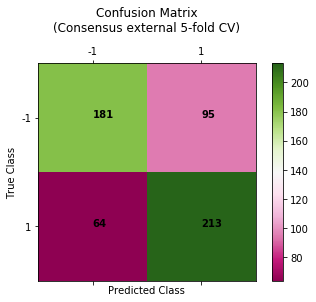

########################################
#   Unbalanced Statistical Parameters  #
########################################
Accuracy: 0.71
Area under the Curve (AUC): 0.71
########################################
#   Balanced Statistical Parameters    #
########################################
Correct Classification Rate (CCR): 0.72
Weighted Kappa:  0.42
########################################
#            Positive Class            #
########################################
Sensitivity (Se): 0.77
Positive Predictive Value (PPV): 0.69
########################################
#            Negative Class            #
########################################
Specificity (Sp): 0.66
Negative Predictive Value (NPV): 0.74
########################################
#     Other Statistical Parameters     #
########################################
Precision:  0.69
Recall:  0.77
F1:  0.73
########################################
#        Applicability Domain          #
##############################

In [20]:
run_statistics(moldf_global['Outcome'], moldf_global['Consensus'], label="Consensus external 5-fold CV", coverage=100)

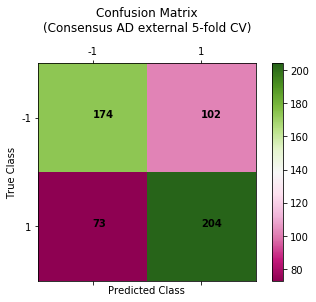

########################################
#   Unbalanced Statistical Parameters  #
########################################
Accuracy: 0.68
Area under the Curve (AUC): 0.68
########################################
#   Balanced Statistical Parameters    #
########################################
Correct Classification Rate (CCR): 0.68
Weighted Kappa:  0.37
########################################
#            Positive Class            #
########################################
Sensitivity (Se): 0.74
Positive Predictive Value (PPV): 0.67
########################################
#            Negative Class            #
########################################
Specificity (Sp): 0.63
Negative Predictive Value (NPV): 0.7
########################################
#     Other Statistical Parameters     #
########################################
Precision:  0.67
Recall:  0.74
F1:  0.7
########################################
#        Applicability Domain          #
################################

In [21]:
coverage= (len(moldf_global['Consensus AD'])*100/len(moldf))
run_statistics(moldf_global['Outcome'], moldf_global['Consensus AD'], 
               label="Consensus AD external 5-fold CV", coverage=int(coverage))